# Importing the libraries

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Importing the dataset

In [19]:
df = pd.read_csv('../Data/results_v6.csv')
df.sample(5)

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_ac,p4_avg_save,num_of_monsters,monster_name,monster_cr,monster_ac,monster_hp,monster_type,dificulty,players_level
60121,Monk,30,14,3,Monk,28,10,3,Artificer,17,...,15,3,1,Lost Sorrowsworn,7.00,15,78,monstrosity,0.582494,3
57374,Rogue,17,14,2,Ranger,16,17,2,Cleric,15,...,13,2,10,Kuo-toa,0.25,13,18,humanoid,0.049085,2
61698,Wizzard,12,13,3,Warlock,31,14,3,Paladin,24,...,15,3,10,Duodrone,0.25,15,11,construct,0.000000,3
80499,Cleric,6,15,2,Warlock,5,16,2,Ranger,6,...,14,2,1,Maw Demon,1.00,13,33,fiend,0.580818,1
30384,Wizzard,9,14,2,Bard,15,15,2,Monk,14,...,12,2,1,Chasme,6.00,15,84,fiend,0.000000,2


In [20]:
df_test = pd.read_csv('../Data/test_sample.csv', encoding='utf-8')
df_test.sample(5)

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_ac,p4_avg_save,num_of_monsters,monster_name,monster_cr,monster_ac,monster_hp,monster_type,dificulty,players_level
2217,Bard,6,12,2,Cleric,10,17,2,Fighter,8,...,12,2,2,Ghoul,1.0,12,22,undead,0.890053,1
490,Wizzard,3,11,2,Cleric,7,16,2,Rogue,10,...,13,2,2,Female Steeder,1.0,14,30,monstrosity,0.000000,1
309,Wizzard,31,12,3,Wizzard,27,11,3,Rogue,22,...,13,3,3,Barlgura,5.0,15,68,fiend,0.000000,4
2728,Bard,18,16,3,Monk,20,16,3,Artificer,24,...,11,3,10,Crawling Claw,0.0,12,2,undead,0.972426,3
4300,Warlock,12,14,2,Sorcerer,10,13,2,Cleric,13,...,15,2,1,Ochre Jelly,2.0,8,45,ooze,0.776660,2


# Cleaning the data

## Dropping the columns that wont help in prediction

In [21]:
df.drop(columns=['monster_name'], inplace=True)
print(df.shape)
df.head()

(103086, 23)


,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,monster_type,dificulty,players_level
0,Artificer,38,12,3,Bard,38,13,3,Barbarian,51,...,43,14,3,1,11.00,17,200,elemental,0.869491,5
1,Bard,24,12,3,Barbarian,36,17,3,Sorcerer,13,...,25,15,3,10,0.25,13,22,beast,0.067640,3
2,Ranger,17,12,2,Ranger,12,15,2,Druid,12,...,14,14,2,1,6.00,16,85,elemental,1.000000,2
3,Fighter,32,18,3,Paladin,32,19,3,Paladin,21,...,27,13,3,1,7.00,15,123,aberration,0.285597,3
4,Cleric,26,12,3,Paladin,34,15,3,Cleric,25,...,25,13,3,4,2.00,13,27,humanoid,0.445773,4


In [22]:
df_test.drop(columns=['monster_name'], inplace=True)
print(df_test.shape)
df_test.head()

(4498, 23)


,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,monster_type,dificulty,players_level
0,Fighter,10,18,2,Artificer,9,17,2,Cleric,6,...,8,18,2,1,1.00,13,28,beast,0.880663,1
1,Paladin,40,18,3,Rogue,25,16,3,Fighter,37,...,57,17,3,1,5.00,15,75,monstrosity,0.929774,5
2,Warlock,15,13,2,Ranger,17,16,2,Fighter,17,...,12,14,2,2,2.00,13,30,beast,0.534813,2
3,Monk,16,13,3,Monk,18,11,3,Paladin,26,...,30,12,3,1,5.00,13,95,beast,0.642994,3
4,Wizzard,4,11,2,Paladin,11,15,2,Sorcerer,6,...,6,16,2,10,0.25,15,11,construct,0.000000,1


In [23]:
df_test_result = df_test[['dificulty']]
df_test_result.head()

,dificulty
0,0.880663
1,0.929774
2,0.534813
3,0.642994
4,0.000000


In [24]:
df_test.drop(columns=['dificulty'], inplace=True)
df_test.head()

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_class,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,monster_type,players_level
0,Fighter,10,18,2,Artificer,9,17,2,Cleric,6,...,Cleric,8,18,2,1,1.00,13,28,beast,1
1,Paladin,40,18,3,Rogue,25,16,3,Fighter,37,...,Ranger,57,17,3,1,5.00,15,75,monstrosity,5
2,Warlock,15,13,2,Ranger,17,16,2,Fighter,17,...,Cleric,12,14,2,2,2.00,13,30,beast,2
3,Monk,16,13,3,Monk,18,11,3,Paladin,26,...,Artificer,30,12,3,1,5.00,13,95,beast,3
4,Wizzard,4,11,2,Paladin,11,15,2,Sorcerer,6,...,Bard,6,16,2,10,0.25,15,11,construct,1


## Dropping miswrote data


In [25]:
df.p1_class.value_counts()

p1_class
Cleric       8046
Wizzard      8017
Rogue        7995
Warlock      7992
Paladin      7972
Monk         7948
Fighter      7931
Barbarian    7894
Artificer    7886
Ranger       7879
Sorcerer     7863
Druid        7832
Bard         7831
Name: count, dtype: int64

In [26]:
df = df[df['p1_class'] != '22']
df = df[df['dificulty'] >= 0]
df = df[df['monster_cr'] != -1]
df = df[df['players_level'] <= 5]
df.head()

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,monster_type,dificulty,players_level
0,Artificer,38,12,3,Bard,38,13,3,Barbarian,51,...,43,14,3,1,11.00,17,200,elemental,0.869491,5
1,Bard,24,12,3,Barbarian,36,17,3,Sorcerer,13,...,25,15,3,10,0.25,13,22,beast,0.067640,3
2,Ranger,17,12,2,Ranger,12,15,2,Druid,12,...,14,14,2,1,6.00,16,85,elemental,1.000000,2
3,Fighter,32,18,3,Paladin,32,19,3,Paladin,21,...,27,13,3,1,7.00,15,123,aberration,0.285597,3
4,Cleric,26,12,3,Paladin,34,15,3,Cleric,25,...,25,13,3,4,2.00,13,27,humanoid,0.445773,4


In [27]:
corr_matrix = df.corr(numeric_only=True)
abs(corr_matrix['dificulty']).sort_values(ascending = False)

dificulty          1.000000
num_of_monsters    0.244230
players_level      0.176662
p3_hp              0.176218
p2_hp              0.174881
p1_hp              0.174119
p4_hp              0.172930
p2_avg_save        0.143449
p3_avg_save        0.143449
p4_avg_save        0.143449
p1_avg_save        0.143449
monster_hp         0.098328
monster_cr         0.055285
monster_ac         0.048969
p1_ac              0.039577
p4_ac              0.037814
p3_ac              0.037377
p2_ac              0.033942
Name: dificulty, dtype: float64

# Sampling the data

In [28]:
X = df.drop(columns=['dificulty'])
X.sample(5)

,p1_class,p1_hp,p1_ac,p1_avg_save,p2_class,p2_hp,p2_ac,p2_avg_save,p3_class,p3_hp,...,p4_class,p4_hp,p4_ac,p4_avg_save,num_of_monsters,monster_cr,monster_ac,monster_hp,monster_type,players_level
28299,Druid,26,11,3,Rogue,19,12,3,Fighter,39,...,Artificer,28,15,3,9,1.00,11,36,construct,4
54240,Paladin,37,18,3,Paladin,37,14,3,Monk,18,...,Artificer,29,15,3,10,0.25,12,11,undead,4
48718,Paladin,44,19,3,Ranger,35,16,3,Wizzard,27,...,Monk,35,14,3,1,8.00,18,136,dragon,4
47443,Ranger,52,16,3,Artificer,32,15,3,Rogue,34,...,Druid,38,15,3,5,4.00,12,36,undead,5
3672,Sorcerer,18,12,3,Monk,27,12,3,Rogue,34,...,Cleric,22,12,3,2,3.00,14,45,undead,4


In [29]:
Y = df['dificulty'].copy()
Y.sample(5)

5405     0.000000
62597    0.911993
83805    0.000000
98278    0.000000
79994    1.000000
Name: dificulty, dtype: float64

# One hot encoding the categorical data

In [30]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
features_df = encoder.fit_transform(X[['p1_class', 'p2_class', 'p3_class', 'p4_class', 'monster_type']])
X_encoded = pd.concat([X, features_df], axis=1).drop(columns=['p1_class', 'p2_class', 'p3_class', 'p4_class', 'monster_type'])
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102817 entries, 0 to 103085
Data columns (total 83 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   p1_hp                     102817 non-null  int64  
 1   p1_ac                     102817 non-null  int64  
 2   p1_avg_save               102817 non-null  int64  
 3   p2_hp                     102817 non-null  int64  
 4   p2_ac                     102817 non-null  int64  
 5   p2_avg_save               102817 non-null  int64  
 6   p3_hp                     102817 non-null  int64  
 7   p3_ac                     102817 non-null  int64  
 8   p3_avg_save               102817 non-null  int64  
 9   p4_hp                     102817 non-null  int64  
 10  p4_ac                     102817 non-null  int64  
 11  p4_avg_save               102817 non-null  int64  
 12  num_of_monsters           102817 non-null  int64  
 13  monster_cr                102817 non-null  float6

In [31]:
test_features_df = encoder.transform(df_test[['p1_class', 'p2_class', 'p3_class', 'p4_class', 'monster_type']])
df_test_encoded = pd.concat([df_test, test_features_df], axis=1).drop(columns=['p1_class', 'p2_class', 'p3_class', 'p4_class', 'monster_type'])
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4498 entries, 0 to 4497
Data columns (total 83 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   p1_hp                     4498 non-null   int64  
 1   p1_ac                     4498 non-null   int64  
 2   p1_avg_save               4498 non-null   int64  
 3   p2_hp                     4498 non-null   int64  
 4   p2_ac                     4498 non-null   int64  
 5   p2_avg_save               4498 non-null   int64  
 6   p3_hp                     4498 non-null   int64  
 7   p3_ac                     4498 non-null   int64  
 8   p3_avg_save               4498 non-null   int64  
 9   p4_hp                     4498 non-null   int64  
 10  p4_ac                     4498 non-null   int64  
 11  p4_avg_save               4498 non-null   int64  
 12  num_of_monsters           4498 non-null   int64  
 13  monster_cr                4498 non-null   float64
 14  monster_

In [32]:
print(len(Y))
print(len(X_encoded))

102817
102817


# Splitting the dataset into the Training set and Test set

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=.2)

# Fitting the XGBoost Regression to the dataset

In [34]:
import xgboost as xgb

clfXGB = xgb.XGBRegressor(early_stopping_rounds=10, eval_set=[(X_test, Y_test)])
clfXGB.fit( X_train,
            Y_train,
            verbose=100,
            eval_metric='rmse',
            eval_set=[(X_train, Y_train),(X_test, Y_test)]
            )

[0]	validation_0-rmse:0.34936	validation_1-rmse:0.35047


c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\5e_encounter_predictor\.venv\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\5e_encounter_predictor\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [11:28:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "eval_set" } are not used.

  warnings.warn(smsg, UserWarning)


[99]	validation_0-rmse:0.16842	validation_1-rmse:0.18787


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None,
             eval_set=[(       p1_hp  p1_ac  p1_avg_save  p2_hp  p2_ac  p2_avg_save  p3_hp  p3_ac  \
31195      8     14            2      7     12            2      7     16   
31811      7     15            2      7     13            2     11     12   
66606      6     15            2      7     12            2      6     17   
3566      22     13            3     22     13            3     18     15   
57791     23     13            3     38     17            3     1...
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# Predicting the using the model

In [35]:
clfXGB.score(X_test, Y_test)

0.7782764953469513

In [36]:
from random import randint

def predict(model,test, Y):
    input_test = randint(0, len(test))
    row_input = pd.DataFrame(test.iloc[input_test]).T
    try:
        print_input = pd.DataFrame(normalizer.inverse_transform(row_input), columns=row_input.columns)
    except:
        try:
            print_input = pd.DataFrame(scaler.inverse_transform(row_input), columns=row_input.columns)
        except:
            print_input = row_input 
    print('Input: ')
    display(row_input)
    print(f'The combat was between 4 players level {print_input.players_level.values[0]} against {print_input.num_of_monsters.values[0]} monster(s) CR {print_input.monster_cr.values[0]}')
    print('Expected: ', Y.iloc[input_test][0])
    print(type(row_input.values))
    print('Predicted: ', model.predict(row_input.values)[0])

In [75]:
predict(clfXGB, df_test_encoded, df_test_result)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
3337,21.0,19.0,3.0,41.0,15.0,3.0,37.0,18.0,3.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The combat was between 4 players level 4.0 against 9.0 monster(s) CR 1.0
Expected:  0.0
<class 'numpy.ndarray'>
Predicted:  -0.0002656437


# Seeing the model feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

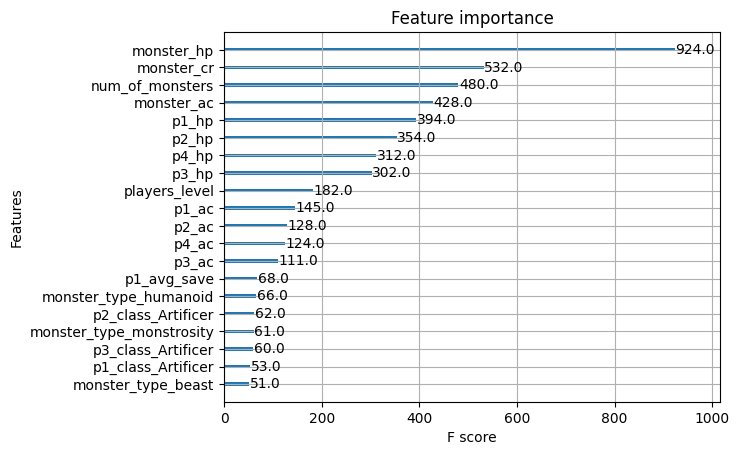

In [76]:
from xgboost import plot_importance

plot_importance(clfXGB, max_num_features=20, importance_type='weight')

# Hyperparameter tuning using GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

def parameter_search(params):
    search = GridSearchCV(xgb.XGBRegressor(
                            subsample=0.9,
                            colsample_bytree=0.5,
                            ),
                            param_grid=params,
                            scoring=['r2','neg_mean_squared_error'],
                            refit='r2',
                            n_jobs=-1,
                            cv=5,
                            verbose=4)
    search.fit(X_train, Y_train)
    print(search.best_score_)
    return search.best_params_

## Round 1

In [40]:
# search_sapce = {
#     'n_estimators': [100, 150, 200],
#     'max_depth': [1, 3, 5],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [1, 3, 5],
#     'base_score': [0.2, 0.5, 0.8],
# }

# parameter_search(search_sapce)

## Round 2

In [41]:
# search_sapce = {
#     'n_estimators': [200, 300, 400],
#     'max_depth': [5,7,9],
#     'learning_rate': [0.1, 0.25, 0.5],
#     'gamma': [0.25],
#     'reg_lambda': [0.1,0.5,1],
#     'scale_pos_weight': [1],
#     'base_score': [0.8],
# }

# parameter_search(search_sapce)

## Round 3

In [42]:
# params = {
#     'n_estimators': [400, 650, 800],
#     'max_depth': [9,10,11],
#     'learning_rate': [0.1],
#     'gamma': [0.25],
#     'reg_lambda': [1],
#     'scale_pos_weight': [1],
#     'base_score': [0.8],
# }

# parameter_search(params)

## Round 4

In [43]:
# params = {
#     'n_estimators': [800,1000,1200],
#     'max_depth': [9],
#     'learning_rate': [0.1],
#     'gamma': [0.25],
#     'reg_lambda': [1],
#     'scale_pos_weight': [1],
#     'base_score': [0.8],
# }

# parameter_search(params)

In [44]:
FINAL_PARAMETERS_GCV = {
    'gamma': 0.25,
    'learning_rate': 0.1,
    'max_depth': 9,
    'n_estimators': 1200,
    'reg_lambda': 1,
    'scale_pos_weight': 1
 }

## Making the regression model

In [45]:
model_GCV = xgb.XGBRegressor(**FINAL_PARAMETERS_GCV, booster='gbtree',early_stopping_rounds=10,eval_metric='rmse')
model_GCV.fit( X_train,
            Y_train,
            eval_set=[(X_train, Y_train),(X_test, Y_test)],
            verbose=100
            
          )

[0]	validation_0-rmse:0.37508	validation_1-rmse:0.37644
[100]	validation_0-rmse:0.16507	validation_1-rmse:0.18891
[126]	validation_0-rmse:0.16424	validation_1-rmse:0.18832


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.25, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## R² score of the model

In [46]:
model_GCV.score(X_test, Y_test)

0.7772191673281615

## Making predictions

In [47]:
predict(model_GCV, df_test_encoded, df_test_result)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
1566,17.0,11.0,2.0,13.0,19.0,2.0,15.0,16.0,2.0,15.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


The combat was between 4 players level 2.0 against 1.0 monster(s) CR 6.0
Expected:  0.0
<class 'numpy.ndarray'>
Predicted:  -0.057958443


### Seeing the model feature importance


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

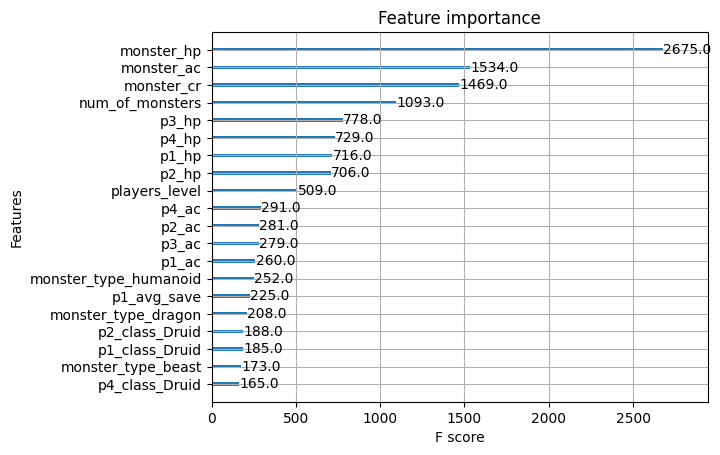

In [48]:
plot_importance(model_GCV, max_num_features=20, importance_type='weight')

# Hyperparameter tuning using Optuna

In [49]:
import optuna

c:\Users\Pedro\OneDrive - Instituto Maua de Tecnologia\5e_encounter_predictor\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [50]:
from sklearn.metrics import mean_squared_error
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15, step=0.005),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'base_score': trial.suggest_float('base_score', 0.1, 0.9, step=0.1),
    }
    model = xgb.XGBRegressor(**param)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    return mean_squared_error(Y_test, Y_pred)

In [51]:
# study = optuna.create_study(direction='minimize', study_name='regression')
# study.optimize(objective, n_trials=100, n_jobs=-1)
# study.best_params


## Making the regression model

In [52]:
# FINAL_PARAMETERS_OPT = study.best_params
FINAL_PARAMETERS_OPT = {
    'max_depth': 10,
    'learning_rate': 0.045000000000000005,
    'n_estimators': 608,
    'gamma': 0.011766503509674925,
    'reg_lambda': 0.04863993937887906,
    'scale_pos_weight': 4.214943902447393,
    'base_score': 0.4
    }

model_OPT = xgb.XGBRegressor(**FINAL_PARAMETERS_OPT, booster='gbtree',early_stopping_rounds=10,eval_metric='rmse')
model_OPT.fit(  X_train,
            Y_train,
            eval_set=[(X_train, Y_train),(X_test, Y_test)],
            verbose=100
          )

[0]	validation_0-rmse:0.39135	validation_1-rmse:0.39223
[100]	validation_0-rmse:0.17170	validation_1-rmse:0.20090
[200]	validation_0-rmse:0.13724	validation_1-rmse:0.18413
[300]	validation_0-rmse:0.11770	validation_1-rmse:0.17666
[400]	validation_0-rmse:0.10497	validation_1-rmse:0.17262
[438]	validation_0-rmse:0.10353	validation_1-rmse:0.17222


XGBRegressor(base_score=0.4, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.011766503509674925, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.045000000000000005,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=608, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## R² score of the model

In [53]:
model_OPT.score(X_test, Y_test)

0.8136904817229327

## Making predictions

In [54]:
predict(model_OPT, df_test_encoded, df_test_result)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
273,8.0,11.0,2.0,9.0,17.0,2.0,9.0,13.0,2.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


The combat was between 4 players level 1.0 against 1.0 monster(s) CR 2.0
Expected:  0.5151515151515151
<class 'numpy.ndarray'>
Predicted:  0.6515865


## Seeing the model feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

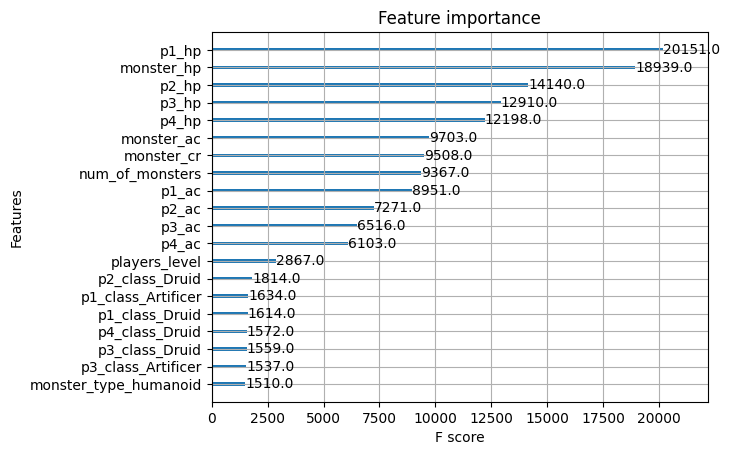

In [55]:
plot_importance(model_OPT, max_num_features=20, importance_type='weight')

# Scaling the data with StandardScaler beforehand  

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_encoded)
X_encoded_scaled = scaler.transform(X_encoded)
df_test_encoded_scaled = scaler.transform(df_test_encoded)
X_encoded_scaled = pd.DataFrame(X_encoded_scaled, columns=X_encoded.columns)
df_test_encoded_scaled = pd.DataFrame(df_test_encoded_scaled, columns=df_test_encoded.columns)
X_encoded_scaled

,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
0,1.142335,-0.994412,0.815723,1.142555,-0.549494,0.815723,2.171532,1.227785,0.815723,1.535610,...,-0.234171,4.452618,-0.204958,-0.280589,-0.165435,-0.491423,-0.393602,-0.11745,-0.190484,-0.248767
1,0.034070,-0.994412,0.815723,0.984249,1.225464,0.815723,-0.836419,-0.554420,0.815723,0.113247,...,-0.234171,-0.224587,-0.204958,-0.280589,-0.165435,-0.491423,-0.393602,-0.11745,-0.190484,-0.248767
2,-0.520063,-0.994412,-1.225907,-0.915425,0.337985,-1.225907,-0.915576,0.782233,-1.225907,-0.755975,...,-0.234171,4.452618,-0.204958,-0.280589,-0.165435,-0.491423,-0.393602,-0.11745,-0.190484,-0.248767
3,0.667365,1.669771,0.815723,0.667637,2.112943,0.815723,-0.203166,2.118887,0.815723,0.271287,...,-0.234171,-0.224587,-0.204958,-0.280589,-0.165435,-0.491423,-0.393602,-0.11745,-0.190484,-0.248767
4,0.192394,-0.994412,0.815723,0.825943,0.337985,0.815723,0.113460,-0.554420,0.815723,0.113247,...,-0.234171,-0.224587,-0.204958,-0.280589,-0.165435,2.034908,-0.393602,-0.11745,-0.190484,-0.248767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102812,0.746526,2.557833,0.815723,0.588483,-0.549494,0.815723,0.825870,-0.108869,0.815723,1.377570,...,-0.234171,-0.224587,-0.204958,-0.280589,-0.165435,-0.491423,-0.393602,-0.11745,-0.190484,-0.248767
102813,1.775630,0.337680,0.815723,0.905096,-0.105755,0.815723,0.271773,-0.554420,0.815723,0.508348,...,-0.234171,-0.224587,-0.204958,-0.280589,-0.165435,-0.491423,-0.393602,-0.11745,-0.190484,-0.248767
102814,-0.836710,-1.438443,-1.225907,-0.677966,-1.436974,-1.225907,-0.361480,1.673336,-1.225907,-1.151076,...,-0.234171,-0.224587,-0.204958,-0.280589,-0.165435,2.034908,-0.393602,-0.11745,-0.190484,-0.248767
102815,-0.995033,-0.994412,-1.225907,-0.994578,-0.549494,-1.225907,-0.678106,1.227785,-1.225907,-0.597935,...,-0.234171,-0.224587,-0.204958,-0.280589,-0.165435,-0.491423,-0.393602,-0.11745,-0.190484,-0.248767


In [79]:
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(X_encoded_scaled, Y, test_size=.2)

# Optune with scaled data

In [80]:
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15, step=0.005),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'base_score': trial.suggest_float('base_score', 0.1, 0.9, step=0.1),
    }
    model = xgb.XGBRegressor(**param)
    model.fit(X_train_scaled, Y_train_scaled)
    Y_pred = model.predict(X_test_scaled)
    return mean_squared_error(Y_test_scaled, Y_pred)

In [82]:
from sklearn.metrics import mean_squared_error

study = optuna.create_study(direction='minimize', study_name='regression')
study.optimize(objective, n_trials=200, n_jobs=-1)
study.best_params

[I 2023-12-07 11:31:47,414] A new study created in memory with name: regression
[I 2023-12-07 11:31:49,522] Trial 7 finished with value: 0.08954828661387292 and parameters: {'max_depth': 2, 'learning_rate': 0.125, 'n_estimators': 59, 'gamma': 0.5144927760627608, 'reg_lambda': 0.3935159385034631, 'scale_pos_weight': 1.4882989548260122, 'base_score': 0.2}. Best is trial 7 with value: 0.08954828661387292.
[I 2023-12-07 11:31:52,353] Trial 3 finished with value: 0.09485532682127659 and parameters: {'max_depth': 1, 'learning_rate': 0.075, 'n_estimators': 300, 'gamma': 0.08698518178547399, 'reg_lambda': 0.8740811628531446, 'scale_pos_weight': 2.2822214476329883, 'base_score': 0.2}. Best is trial 7 with value: 0.08954828661387292.
[I 2023-12-07 11:31:53,204] Trial 12 finished with value: 0.07197007013141156 and parameters: {'max_depth': 3, 'learning_rate': 0.13, 'n_estimators': 120, 'gamma': 0.17019049096807454, 'reg_lambda': 0.7366579855259002, 'scale_pos_weight': 5.4086029354697125, 'base_s

{'max_depth': 10,
 'learning_rate': 0.105,
 'n_estimators': 350,
 'gamma': 0.01055558150256804,
 'reg_lambda': 0.28232001135203716,
 'scale_pos_weight': 1.6105158461610143,
 'base_score': 0.5}

In [84]:
# FINAL_PARAMETERS_OPT_SCALED = study.best_params
FINAL_PARAMETERS_OPT_SCALED={
  'max_depth': 10,
  'learning_rate': 0.105,
  'n_estimators': 350,
  'gamma': 0.01055558150256804,
  'reg_lambda': 0.28232001135203716,
  'scale_pos_weight': 1.6105158461610143,
  'base_score': 0.5
}

model_OPT_SCALED = xgb.XGBRegressor(**FINAL_PARAMETERS_OPT_SCALED, booster='gbtree',early_stopping_rounds=10,eval_metric='rmse')
model_OPT_SCALED.fit(
            X_train_scaled,
            Y_train_scaled,
            eval_set=[(X_train_scaled, Y_train_scaled),(X_test_scaled, Y_test_scaled)],
            verbose=100
          )

[0]	validation_0-rmse:0.37549	validation_1-rmse:0.37576
[100]	validation_0-rmse:0.12513	validation_1-rmse:0.17720
[193]	validation_0-rmse:0.09698	validation_1-rmse:0.16747


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.01055558150256804, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.105, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=350, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [85]:
model_OPT_SCALED.score(X_test_scaled, Y_test_scaled)

0.8229335540900882

In [106]:
predict(model_OPT_SCALED, df_test_encoded_scaled, df_test_result)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
3586,1.458983,0.78171,0.815723,1.300861,0.781724,0.815723,-0.044853,-0.108869,0.815723,-0.281854,...,-0.234171,-0.224587,-0.204958,-0.280589,-0.165435,-0.491423,-0.393602,-0.11745,-0.190484,-0.248767


The combat was between 4 players level 4.0 against 10.0 monster(s) CR 0.25
Expected:  0.5623193677806422
<class 'numpy.ndarray'>
Predicted:  0.4910107


<Axes: title={'center': 'Scaled'}, xlabel='F score', ylabel='Features'>

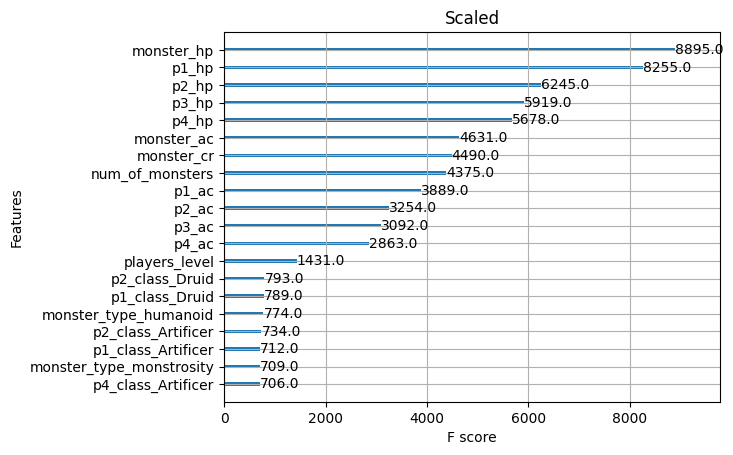

In [107]:
plot_importance(model_OPT_SCALED, max_num_features=20, importance_type='weight', title='Scaled')

# Normalizing the data with MinMaxScaller beforehand  

In [110]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normalizer.fit(X_encoded)
X_encoded_normalized = normalizer.transform(X_encoded)
df_test_encoded_nomalized = normalizer.transform(df_test_encoded)
X_encoded_normalized = pd.DataFrame(X_encoded_normalized, columns=X_encoded.columns)
df_test_encoded_nomalized = pd.DataFrame(df_test_encoded_nomalized, columns=df_test_encoded.columns)
X_encoded_normalized

,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
0,0.500000,0.2,1.0,0.507246,0.3,1.0,0.676056,0.7,1.0,0.579710,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.300000,0.2,1.0,0.478261,0.7,1.0,0.140845,0.3,1.0,0.318841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.200000,0.2,0.0,0.130435,0.5,0.0,0.126761,0.6,0.0,0.159420,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.414286,0.8,1.0,0.420290,0.9,1.0,0.253521,0.9,1.0,0.347826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.328571,0.2,1.0,0.449275,0.5,1.0,0.309859,0.3,1.0,0.318841,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102812,0.428571,1.0,1.0,0.405797,0.3,1.0,0.436620,0.4,1.0,0.550725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102813,0.614286,0.5,1.0,0.463768,0.4,1.0,0.338028,0.3,1.0,0.391304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102814,0.142857,0.1,0.0,0.173913,0.1,0.0,0.225352,0.8,0.0,0.086957,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
102815,0.114286,0.2,0.0,0.115942,0.3,0.0,0.169014,0.7,0.0,0.188406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
X_train_normalized, X_test_normalized, Y_train_normalized, Y_test_normalized = train_test_split(X_encoded_normalized, Y, test_size=.2)

In [113]:
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15, step=0.005),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'base_score': trial.suggest_float('base_score', 0.1, 0.9, step=0.1),
    }
    model = xgb.XGBRegressor(**param)
    model.fit(X_train_normalized, Y_train_normalized)
    Y_pred = model.predict(X_test_normalized)
    return mean_squared_error(Y_test_normalized, Y_pred)

In [114]:
study = optuna.create_study(direction='minimize', study_name='regression')
study.optimize(objective, n_trials=200, n_jobs=-1)
study.best_params

[I 2023-12-07 11:38:22,955] A new study created in memory with name: regression
[I 2023-12-07 11:38:25,062] Trial 7 finished with value: 0.11350966127996465 and parameters: {'max_depth': 1, 'learning_rate': 0.105, 'n_estimators': 90, 'gamma': 0.45174932521717526, 'reg_lambda': 0.6378481646659837, 'scale_pos_weight': 2.84166617728739, 'base_score': 0.2}. Best is trial 7 with value: 0.11350966127996465.
[I 2023-12-07 11:38:26,976] Trial 5 finished with value: 0.08059381429658294 and parameters: {'max_depth': 5, 'learning_rate': 0.045000000000000005, 'n_estimators': 66, 'gamma': 0.09039110458490333, 'reg_lambda': 0.9183888148286905, 'scale_pos_weight': 6.833509182214885, 'base_score': 0.30000000000000004}. Best is trial 5 with value: 0.08059381429658294.
[I 2023-12-07 11:38:28,436] Trial 12 finished with value: 0.12846593170665063 and parameters: {'max_depth': 1, 'learning_rate': 0.075, 'n_estimators': 239, 'gamma': 0.17461809224554464, 'reg_lambda': 0.7797913085935865, 'scale_pos_weight'

{'max_depth': 10,
 'learning_rate': 0.125,
 'n_estimators': 235,
 'gamma': 0.010459356211425679,
 'reg_lambda': 0.06076837113360946,
 'scale_pos_weight': 1.8140041674271903,
 'base_score': 0.8}

In [115]:
# FINAL_PARAMETERS_OPT_NORMALIZED = study.best_params
FINAL_PARAMETERS_OPT_NORMALIZED={
    'max_depth': 10,
    'learning_rate': 0.125,
    'n_estimators': 235,
    'gamma': 0.010459356211425679,
    'reg_lambda': 0.06076837113360946,
    'scale_pos_weight': 1.8140041674271903,
    'base_score': 0.8
}

model_OPT_NORMALIZED = xgb.XGBRegressor(**FINAL_PARAMETERS_OPT_NORMALIZED, booster='gbtree',early_stopping_rounds=10,eval_metric='rmse')
model_OPT_NORMALIZED.fit(
            X_train_normalized,
            Y_train_normalized,
            eval_set=[(X_train_normalized, Y_train_normalized),(X_test_normalized, Y_test_normalized)],
            verbose=100
          )

[0]	validation_0-rmse:0.47386	validation_1-rmse:0.47633
[100]	validation_0-rmse:0.11774	validation_1-rmse:0.17853
[164]	validation_0-rmse:0.09401	validation_1-rmse:0.16990


XGBRegressor(base_score=0.8, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.010459356211425679, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.125, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=235, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [116]:
model_OPT_NORMALIZED.score(X_test_normalized, Y_test_normalized)

0.8175725767266918

In [126]:
predict(model_OPT_NORMALIZED, df_test_encoded_nomalized, df_test_result)

Input: 


,p1_hp,p1_ac,p1_avg_save,p2_hp,p2_ac,p2_avg_save,p3_hp,p3_ac,p3_avg_save,p4_hp,...,monster_type_dragon,monster_type_elemental,monster_type_fey,monster_type_fiend,monster_type_giant,monster_type_humanoid,monster_type_monstrosity,monster_type_ooze,monster_type_plant,monster_type_undead
2596,0.271429,0.2,0.0,0.15942,0.4,0.0,0.169014,0.5,0.0,0.202899,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


The combat was between 4 players level 2.0 against 1.0 monster(s) CR 5.0
Expected:  0.0
<class 'numpy.ndarray'>
Predicted:  0.14154759


<Axes: title={'center': 'Normalized'}, xlabel='F score', ylabel='Features'>

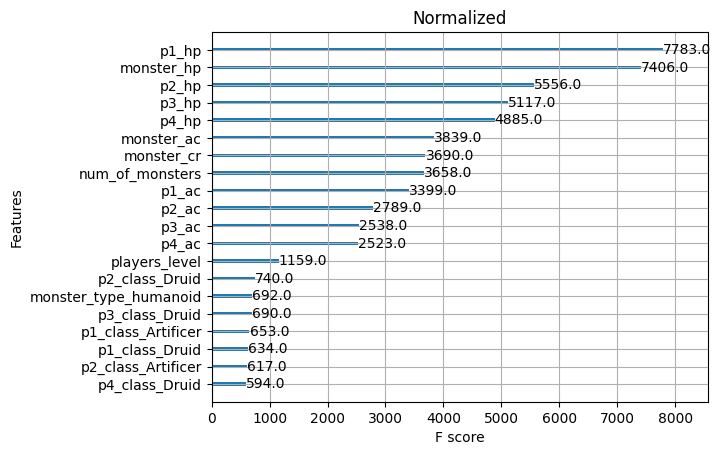

In [127]:
plot_importance(model_OPT_NORMALIZED, max_num_features=20, importance_type='weight', title='Normalized')

In [ ]:
import pickle

# Assuming 'encoder' and 'scaler' are your OneHotEncoder and StandardScaler instances
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

with open('normalizer.pkl', 'wb') as f:
    pickle.dump(normalizer, f)

model_OPT_NORMALIZED.save_model('model_OPT_NORMALIZED.ubj')